### 자동차 가격 예측하기

In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

c:\anaconda3\envs\fastcampus_ml\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\anaconda3\envs\fastcampus_ml\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
# 데이터 불러오기
corolla = pd.read_csv('./data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
# 데이터 수와 변수의 수 확인
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


In [11]:
### 범주형 변수를 이진형 변수로 변환
Fuel_Type = corolla.Fuel_Type.unique()
print(Feul_Type)

dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

['Diesel' 'Petrol' 'CNG']


In [20]:
# 인덱스 슬라이싱 후 (binary = 1) 대입 (one-hot encoding vector로 만들기)
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

### 불필요한 변수 제거 및 가변수 추가

In [24]:
new_Fuel_Type = pd.DataFrame({"Petrol": dummy_p, "Diesel": dummy_d, "CNG": dummy_c})

In [28]:
new_corolla = corolla.drop(["Id", "Model", "Fuel_Type"], axis=1, inplace=False)
new_corolla = pd.concat((new_corolla, new_Feul_Type), axis=1)
new_corolla.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [29]:
# bias 추가
mlr_data = sm.add_constant(new_corolla, has_constant="add")
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


### 설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [34]:
feature_columns = list(mlr_data.columns.difference(["Price"]))

X = mlr_data[feature_columns]
Y = mlr_data.Price

train_x, test_x, train_y, test_y = train_test_split(X, Y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [36]:
# 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()
fitted_full_model.summary()
# => R-squared 값이 높고, 대부분의 변수들의 유의함 (다중공선성이 심함)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     303.2
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:30:32   Log-Likelihood:                -8438.2
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     971   BIC:                         1.711e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -259.1898    134.067     -1.933      0.053    -522.284       3.905
Age_08_04         -120.9691      4.136    -29.250      0.000    -129.085    -112.853
Airbag_1           159.2497    254.669      0.625      0.532    -340.516     659.016
Airbag_2          -157.9082    136.513     -1.157      0.248    -425.802     109.986
Airco              181.4933     94.240      1.926      0.054      -3.443     366.430
Automatic          449.1251    167.307      2.684      0.007     120.800     777.450
Automatic_airco   2198.4085    196.512     11.187      0.000    1812.772    2584.045
BOVAG_Guarantee    479.4326    136.092      3.523      0.000     212.364     746.501
Backseat_Divider  -247.2303    140.347     -1.762      0.078    -522.648      28.188
Boardcomputer     -365.8165    121.289     -3.016      0.003    -603.836    -127.797
CD_Player          391.2716    104.807      3.733      0.000     185.598     596.946
CNG              -1073.6387    227.545     -4.718      0.000   -1520.176    -627.101
Central_Lock       113.3597    154.990      0.731      0.465    -190.795     417.514
Cylinders           -0.0384      0.003    -15.259      0.000      -0.043      -0.033
Diesel             -27.7590    194.545     -0.143      0.887    -409.536     354.018
Doors               47.4776     43.181      1.099      0.272     -37.262     132.217
Gears              485.0255    241.104      2.012      0.045      11.880     958.171
Guarantee_Period    54.0777     14.064      3.845      0.000      26.478      81.678
HP                  16.6002      3.767      4.407      0.000       9.207      23.993
KM                  -0.0157      0.001    -11.889      0.000      -0.018      -0.013
Met_Color          -22.4105     78.624     -0.285      0.776    -176.703     131.882
Metallic_Rim       171.7909     97.265      1.766      0.078     -19.082     362.664
Mfg_Month         -100.7659     10.761     -9.364      0.000    -121.883     -79.648
Mfg_Year            -0.7872      0.990     -0.795      0.427      -2.730       1.155
Mfr_Guarantee      253.7695     77.840      3.260      0.001     101.016     406.523
Mistlamps          -94.8396    115.173     -0.823      0.410    -320.855     131.176
Petrol            1101.3881    210.226      5.239      0.000     688.838    1513.938
Power_Steering      97.2261    284.097      0.342      0.732    -460.288     654.740
Powered_Windows    221.8986    154.520      1.436      0.151     -81.333     525.130
Quarterly_Tax       12.1677      1.949      6.244      0.000       8.343      15.992
Radio             1385.1284    791.236      1.751      0.080    -167.600    2937.857
Radio_cassette   -1475.9759    789.074     -1.871      0.062   -3024.463      72.511
Sport_Model        170.7817     93.571      1.825      0.068     -12.843     354.406
Tow_Bar           -193.

### VIF 를 통한 다중공선성을 확인

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif
# VIF 가 10보다 크면 다중공선성 존재하지만, 앞의 유의성을 보고 변수를 제거할 지 판단함

c:\anaconda3\envs\fastcampus_ml\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\anaconda3\envs\fastcampus_ml\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


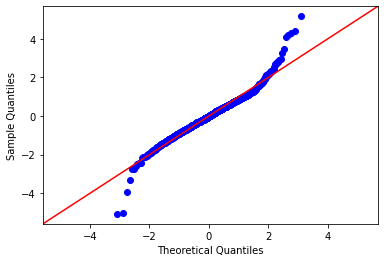

In [46]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# q-q plot 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')
# => 꼬리부분이 곡선형태를 띄는데 이정도면 무난한 적합모델의 수준으로 볼 수 있음

Text(0, 0.5, 'Residual')

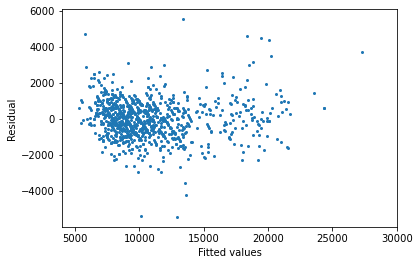

In [47]:
# residual pattern 확인
import matplotlib.pyplot as plt

pred_y = fitted_full_model.predict(train_x)
fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlim(4000, 30000)
plt.xlabel("Fitted values")
plt.ylabel("Residual")

In [50]:
# 검증데이터에 대한 예측
pred_y2 = fitted_full_model.predict(test_x)

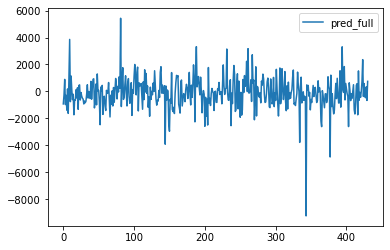

In [51]:
# 잔차 plot
plt.plot(np.array(test_y-pred_y2), label="pred_full")
plt.legend()
plt.show()
# => 잔차가 0에 대부분 머물러 있어보임

In [52]:
# MSE 성능 비교
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=test_y, y_pred=pred_y2)

1404647.1105383218

### 변수선택법

In [55]:
def processSubset(X, Y, feature_set):
    model = sm.OLS(Y, X[list(feature_set)]) # 모델링
    regr = model.fit() # 모델 적합
    AIC = regr.aic # 모델의 AIC
    return {"model":regr, "AIC":AIC}

print(processSubset(X=train_x, Y=train_y, feature_set=feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F357A8C50>, 'AIC': 19090.149805460907}


In [54]:
processSubset(X=train_x, Y=train_y, feature_set=feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x16f3580d7f0>,
 'AIC': 16944.466541721402}

In [61]:
import time
import itertools

# 가장 낮은 AIC를 갖는 모델 선택 및 저장
# "AIC"란 우도(likelihood)와 독립변수의 개수를 고려하여 모델의 성능을 나타낸 지표로써 낮은 점수가 최적의 모델을 의미할 수 있음.
def getBest(X,Y,k):
    tic = time.time()
    results = [] 
    for combo in itertools.combinations(X.columns.difference(["const"]), k): # 각 변수조합을 고려한 경우의 수
        combo = (list(combo) + ["const"])
        
        results.append(processSubset(X,Y,feature_set=combo)) # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    
    # 가장 낮은 AIC를 갖는 모델 선택 및 저장
    best_model = models.loc[models["AIC"].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [62]:
print(getBest(X=train_x, Y=train_y, k=2))

Processed  630 models on 2 predictors in 0.5569164752960205 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17467.5
Name: 211, dtype: object


In [66]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x, Y=train_y, k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds")

Processed  36 models on 1 predictors in 0.03520512580871582 seconds.
Processed  630 models on 2 predictors in 0.5484433174133301 seconds.
Processed  7140 models on 3 predictors in 6.813855171203613 seconds.
Total elapsed time: 7.569581747055054 seconds


In [65]:
models

,AIC,model
1,17711.149570,<statsmodels.regression.linear_model.Regressio...
2,17467.485215,<statsmodels.regression.linear_model.Regressio...
3,17301.628145,<statsmodels.regression.linear_model.Regressio...


In [69]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2156.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:04:04   Log-Likelihood:                -8646.8
No. Observations:                1005   AIC:                         1.730e+04
Df Residuals:                    1001   BIC:                         1.732e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0226      0.001    -17.048      0.000      -0.025      -0.020
Mfg_Year    1509.6621     37.637     40.111      0.000    1435.806    1583.518
Weight        19.1571      0.989     19.379      0.000      17.217      21.097
const      -3.027e+06   7.47e+04    -40.503      0.000   -3.17e+06   -2.88e+06
==============================================================================
Omnibus:                      157.841   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1625.106
Skew:                          -0.350   Prob(JB):                         0.00
Kurtosis:                       9.190   Cond. No.                     1.42e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# 모든 변수들 모델링 한 것과 비교
print("full model Resquared: ", "{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ", "{:.5f}".format(fitted_full_model.aic))
print("selected model Resquared: ", "{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ", "{:.5f}".format(models.loc[3, "model"].aic))

full model Resquared:  0.91153
full model AIC:  16944.46654
selected model Resquared:  0.86601
selected model AIC:  17301.62814


Text(0, 0.5, 'BIC')

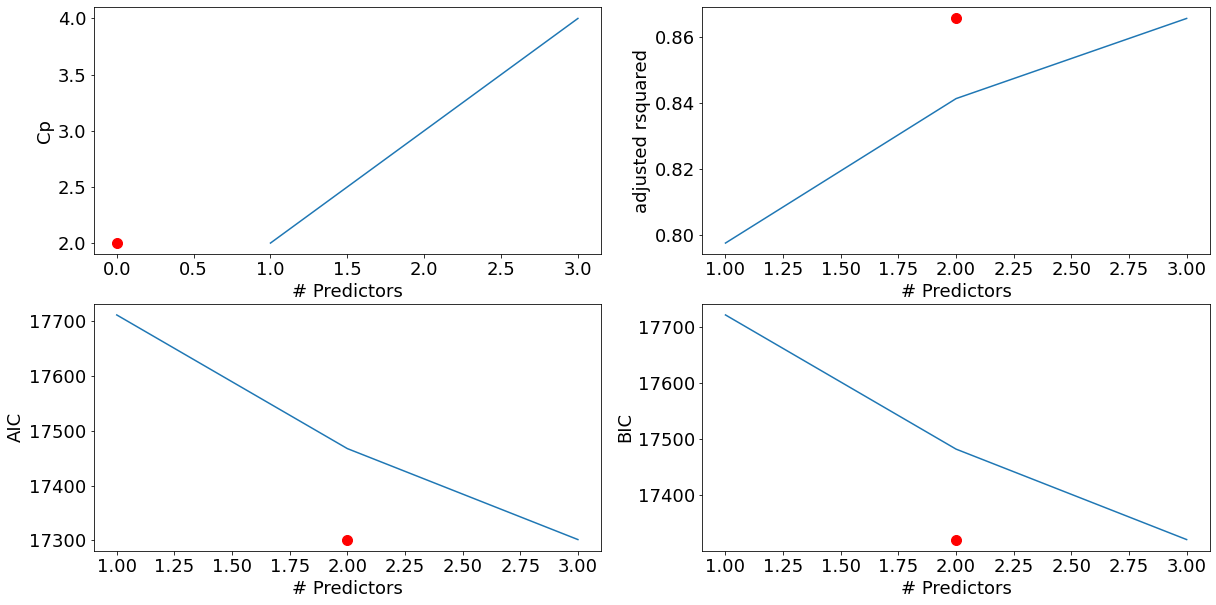

In [81]:
# Plot result
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 18, 'lines.markersize':10})

# Mallow Cp
plt.subplot(2, 2, 1)
Cp = models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total), axis=1)

plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel("# Predictors")
plt.ylabel("Cp")

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel("# Predictors")
plt.ylabel("adjusted rsquared")

# AIC
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel("# Predictors")
plt.ylabel("AIC")

# BIC
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel("# Predictors")
plt.ylabel("BIC")

### 전진선택법

In [103]:
def forward(X, Y, predictors):
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(["const"]) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, Y=Y, feature_set=predictors+[p]+["const"]))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models["AIC"].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:", best_model["model"].model.exog_names, " AIC:", best_model[0])
    return best_model

In [88]:
# 전진선택법 모델
def forward_model(X, Y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(["const"]))+1):
        Forward_result = forward(X=X, Y=Y, predictors=predictors)
        if i > 1:
            if Forward_result["AIC"] > Fmodels_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodels_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != "const"]
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    
    return (Fmodels["model"][len(Fmodels["model"])])

In [89]:
Forward_best_model = forward_model(X=train_x, Y=train_y)

Processed  36 models on 1 predictors in 0.03300738334655762
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F5509AF60>
Processed  35 models on 2 predictors in 0.029006004333496094
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F5509A9B0>
Processed  34 models on 3 predictors in 0.030005931854248047
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F5C701240>
Processed  33 models on 4 predictors in 0.03000640869140625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F65CF3D30>
Processed  32 models on 5 predictors in 0.031007051467895508
Selected predictors: ['Mfg_Year', 'Automatic_airco', '

Processed  10 models on 27 predictors in 0.0200040340423584
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Central_Lock', 'BOVAG_Guarantee', 'Guarantee_Period', 'CD_Player', 'Boardcomputer', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfr_Guarantee', 'Airbag_2', 'Gears', 'CNG', 'Automatic', 'Airco', 'Age_08_04', 'Metallic_Rim', 'Sport_Model', 'ABS', 'Backseat_Divider', 'Mfg_Month', 'Cylinders', 'Diesel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F571AD240>
Processed  9 models on 28 predictors in 0.021004676818847656
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Central_Lock', 'BOVAG_Guarantee', 'Guarantee_Period', 'CD_Player', 'Boardcomputer', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfr_Guarantee', 'Airbag_2', 'Gears', 'CNG', 'Automatic', 'Airco', 'Age_08_04', 'Metallic_Rim', 'Sport_Model', 'ABS', 'Backseat_Divider', 'Mfg_Month', 'Cylinders', 'Diesel', 'Powered_Windows', 'const'] 

In [90]:
Forward_best_model.aic

16937.448546026273

In [91]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     415.7
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:28:29   Log-Likelihood:                -8443.7
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     980   BIC:                         1.706e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year            -0.7350      0.947     -0.776      0.438      -2.594       1.124
Automatic_airco   2142.7788    182.906     11.715      0.000    1783.847    2501.710
HP                  15.8171      3.662      4.319      0.000       8.630      23.004
Weight              13.2784      1.361      9.758      0.000      10.608      15.949
KM                  -0.0157      0.001    -11.958      0.000      -0.018      -0.013
Central_Lock       277.9723     88.061      3.157      0.002     105.163     450.782
BOVAG_Guarantee    495.3739    134.797      3.675      0.000     230.849     759.899
Guarantee_Period    53.9391     14.003      3.852      0.000      26.460      81.418
CD_Player          396.9718    101.771      3.901      0.000     197.258     596.685
Boardcomputer     -351.2048    120.370     -2.918      0.004    -587.417    -114.993
Quarterly_Tax       12.1082      1.912      6.332      0.000       8.356      15.861
Petrol            1141.2073    200.766      5.684      0.000     747.227    1535.188
Tow_Bar           -183.6836     80.268     -2.288      0.022    -341.200     -26.167
Mfr_Guarantee      247.7926     76.812      3.226      0.001      97.058     398.527
Airbag_2          -174.4769    134.430     -1.298      0.195    -438.280      89.326
Gears              406.2675    234.302      1.734      0.083     -53.524     866.059
CNG              -1047.1347    226.193     -4.629      0.000   -1491.014    -603.256
Automatic          400.6997    164.006      2.443      0.015      78.856     722.543
Airco              195.3957     90.245      2.165      0.031      18.300     372.491
Age_08_04         -120.7071      4.013    -30.079      0.000    -128.582    -112.832
Metallic_Rim       154.1593     94.093      1.638      0.102     -30.488     338.806
Sport_Model        168.9243     88.933      1.899      0.058      -5.596     343.445
ABS               -220.9120    130.136     -1.698      0.090    -476.289      34.465
Backseat_Divider  -213.2043    132.533     -1.609      0.108    -473.286      46.878
Mfg_Month         -101.2580     10.726     -9.440      0.000    -122.306     -80.210
Cylinders           -0.0384      0.002    -15.487      0.000      -0.043      -0.034
Diesel             -94.0822    184.245     -0.511      0.610    -455.642     267.477
const               -0.0096      0.001    -15.487      0.000      -0.011      -0.008
==============================================================================
Omnibus:                       83.219   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.047
Skew:                           0.152   Prob(JB):                     2.75e-91
Kurtosis:                       6.141   Cond. No.                     1.88e+16
=====================================================

### 후진소거법

In [98]:
def backward(X, Y, predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors)-1): 
        results.append(processSubset(X=X,Y=Y,feature_set=list(combo)+["const"])) 
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    
    # 가장 낮은 AIC를 갖는 모델 선택 및 저장
    best_model = models.loc[models["AIC"].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    print("Selected predictors:", best_model["model"].model.exog_names, " AIC:", best_model[0])
    return best_model

In [99]:
# 후진소거법 모델
def backward_model(X, Y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index=range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(["const"])
    Bmodel_before = processSubset(X=X, Y=Y, feature_set=predictors)["AIC"]
    while (len(predictors) > 1):
        Backward_result = backward(X=X, Y=Y, predictors=predictors)
        if Backward_result["AIC"] > Bmodel_before:
            break
        Bmodels.loc[len(predictors)-1] = Backward_result
        predictors = Bmodels.loc[len(predictors)-1]["model"].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != "const"]
    
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return (Bmodels["model"].dropna().iloc[0])

In [100]:
Backward_best_model = backward_model(X=train_x, Y=train_y)

Processed  36 models on 35 predictors in 0.09702157974243164 seconds.
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F65C9C470>
Processed  35 models on 34 predictors in 0.08602023124694824 seconds.
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Meta

In [101]:
Backward_best_model.aic

16935.360496951704

In [102]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     400.4
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:39:48   Log-Likelihood:                -8441.7
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     979   BIC:                         1.706e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -332.7546    104.623     -3.181      0.002    -538.066    -127.443
Airco              174.8511     90.274      1.937      0.053      -2.301     352.003
Automatic          380.8080    163.572      2.328      0.020      59.816     701.800
Automatic_airco   2124.4127    182.950     11.612      0.000    1765.394    2483.432
BOVAG_Guarantee    515.2942    134.551      3.830      0.000     251.252     779.336
Backseat_Divider  -296.5174    123.260     -2.406      0.016    -538.402     -54.633
Boardcomputer     -376.7860    120.349     -3.131      0.002    -612.958    -140.614
CD_Player          378.4992    102.807      3.682      0.000     176.753     580.246
Cylinders        -6.868e+05   2.29e+04    -29.974      0.000   -7.32e+05   -6.42e+05
Diesel             979.5431    359.843      2.722      0.007     273.391    1685.695
Gears              391.9937    233.891      1.676      0.094     -66.991     850.978
Guarantee_Period    58.1484     13.833      4.204      0.000      31.002      85.295
HP                  16.1656      3.655      4.423      0.000       8.994      23.337
KM                  -0.0156      0.001    -11.864      0.000      -0.018      -0.013
Metallic_Rim       151.3914     94.036      1.610      0.108     -33.143     335.926
Mfg_Month           18.8839     10.735      1.759      0.079      -2.181      39.949
Mfg_Year          1454.7168     48.842     29.784      0.000    1358.870    1550.564
Mfr_Guarantee      244.7583     76.666      3.193      0.001      94.309     395.207
Petrol            2194.8009    384.448      5.709      0.000    1440.365    2949.237
Powered_Windows    300.3055     87.317      3.439      0.001     128.956     471.655
Quarterly_Tax       11.9128      1.883      6.326      0.000       8.217      15.608
Radio             1507.7525    777.720      1.939      0.053     -18.437    3033.942
Radio_cassette   -1577.5092    777.672     -2.029      0.043   -3103.605     -51.414
Sport_Model        169.2242     88.820      1.905      0.057      -5.075     343.523
Tow_Bar           -181.5381     80.874     -2.245      0.025    -340.244     -22.832
Weight              13.3817      1.357      9.858      0.000      10.718      16.046
const            -1.717e+05   5728.339    -29.974      0.000   -1.83e+05    -1.6e+05
==============================================================================
Omnibus:                       84.486   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.508
Skew:                           0.192   Prob(JB):                     1.97e-89
Kurtosis:                       6.100   Cond. No.                     1.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

### 단계적 선택법

In [108]:
def stepwise_model(X, Y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X=X, Y=Y, feature_set=predictors+["const"])["AIC"]
    
    for i in range(1, len(X.columns.difference(["const"])) + 1):
        Forward_result = forward(X=X, Y=Y, predictors=predictors)
        print("Forward")
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != "const" ]
        
        Backward_result = backward(X=X, Y=Y, predictors=predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != "const" ]
            print("Backward")
            
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])

In [109]:
Stepwise_best_model = stepwise_model(X=train_x, Y=train_y)

Processed  36 models on 1 predictors in 0.03400826454162598
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F5836A048>
Forward
Processed  1 models on 0 predictors in 0.0010001659393310547 seconds.
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F5837CF98>
Processed  35 models on 2 predictors in 0.031009674072265625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F5836A3C8>
Forward
Processed  2 models on 1 predictors in 0.0030014514923095703 seconds.
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F58361EF0>
Processed  34 models on 3 predictors in 0.030007362365722656
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regr

Processed  17 models on 16 predictors in 0.02500629425048828 seconds.
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Central_Lock', 'BOVAG_Guarantee', 'Guarantee_Period', 'CD_Player', 'Boardcomputer', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfr_Guarantee', 'Airbag_2', 'Gears', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F58375BA8>
Processed  19 models on 18 predictors in 0.03200650215148926
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Central_Lock', 'BOVAG_Guarantee', 'Guarantee_Period', 'CD_Player', 'Boardcomputer', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfr_Guarantee', 'Airbag_2', 'Gears', 'CNG', 'Automatic', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F58357978>
Forward
Processed  18 models on 17 predictors in 0.028006792068481445 seconds.
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Central_

Processed  24 models on 23 predictors in 0.04400992393493652 seconds.
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Central_Lock', 'BOVAG_Guarantee', 'Guarantee_Period', 'CD_Player', 'Boardcomputer', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfr_Guarantee', 'Gears', 'Automatic', 'Airco', 'Age_08_04', 'Metallic_Rim', 'Sport_Model', 'ABS', 'Backseat_Divider', 'Diesel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F58339630>
Processed  12 models on 25 predictors in 0.023005247116088867
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Central_Lock', 'BOVAG_Guarantee', 'Guarantee_Period', 'CD_Player', 'Boardcomputer', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfr_Guarantee', 'Gears', 'Automatic', 'Airco', 'Age_08_04', 'Metallic_Rim', 'Sport_Model', 'ABS', 'Backseat_Divider', 'Diesel', 'CNG', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 

Processed  12 models on 25 predictors in 0.025005578994750977
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Central_Lock', 'BOVAG_Guarantee', 'Guarantee_Period', 'CD_Player', 'Boardcomputer', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfr_Guarantee', 'Gears', 'Automatic', 'Airco', 'Age_08_04', 'Metallic_Rim', 'Sport_Model', 'ABS', 'Backseat_Divider', 'Diesel', 'CNG', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016F58362898>
Forward
Processed  25 models on 24 predictors in 0.047010183334350586 seconds.
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Central_Lock', 'BOVAG_Guarantee', 'Guarantee_Period', 'CD_Player', 'Boardcomputer', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfr_Guarantee', 'Gears', 'Automatic', 'Airco', 'Age_08_04', 'Metallic_Rim', 'Sport_Model', 'ABS', 'Backseat_Divider', 'Diesel', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWr

In [110]:
Stepwise_best_model.aic

16937.174589444567

In [111]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     433.4
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:47:59   Log-Likelihood:                -8444.6
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     981   BIC:                         1.706e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1223.7017    128.670      9.510      0.000     971.202    1476.201
Automatic_airco   2145.8576    182.954     11.729      0.000    1786.831    2504.884
HP                  15.9734      3.662      4.362      0.000       8.788      23.159
Weight              13.3856      1.359      9.852      0.000      10.719      16.052
KM                  -0.0157      0.001    -11.957      0.000      -0.018      -0.013
Central_Lock       290.8026     87.535      3.322      0.001     119.026     462.579
BOVAG_Guarantee    506.9457    134.549      3.768      0.000     242.909     770.983
Guarantee_Period    56.8043     13.832      4.107      0.000      29.660      83.949
CD_Player          387.7103    101.556      3.818      0.000     188.419     587.001
Boardcomputer     -362.7590    120.082     -3.021      0.003    -598.406    -127.112
Quarterly_Tax       11.7012      1.887      6.201      0.000       7.998      15.404
Petrol           -6.126e+05   6.44e+04     -9.507      0.000   -7.39e+05   -4.86e+05
Tow_Bar           -185.6103     80.282     -2.312      0.021    -343.154     -28.066
Mfr_Guarantee      244.5919     76.799      3.185      0.001      93.883     395.301
Gears              395.9243    234.248      1.690      0.091     -63.761     855.610
Automatic          391.2438    163.901      2.387      0.017      69.606     712.881
Airco              191.1217     90.216      2.118      0.034      14.082     368.161
Age_08_04          -18.4808     10.723     -1.723      0.085     -39.524       2.563
Metallic_Rim       152.9694     94.121      1.625      0.104     -31.733     337.672
Sport_Model        163.7793     88.875      1.843      0.066     -10.628     338.187
ABS               -321.6753    104.478     -3.079      0.002    -526.702    -116.649
Backseat_Divider  -278.8335    122.551     -2.275      0.023    -519.325     -38.341
Diesel           -6.138e+05   6.44e+04     -9.528      0.000    -7.4e+05   -4.87e+05
CNG              -6.147e+05   6.44e+04     -9.540      0.000   -7.41e+05   -4.88e+05
const            -1.841e+06   1.93e+05     -9.525      0.000   -2.22e+06   -1.46e+06
==============================================================================
Omnibus:                       82.450   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              405.403
Skew:                           0.158   Prob(JB):                     9.28e-89
Kurtosis:                       6.095   Cond. No.                     1.33e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.56e-28. This might indicate that there are
strong multicollinearity problems or that the design 

### 성능평가

In [112]:
# 선택된 변수의 개수
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(28,) (27,) (25,)


In [115]:
# 모델에 의해 예측된 값과 타겟값 비교
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [119]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index=["MSE", "RMSE", "MAE", "MAPE"])

In [118]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [124]:
# 성능지표
from sklearn import metrics

perf_mat.loc["MSE"]["ALL"] = metrics.mean_squared_error(test_y, pred_y_full)
perf_mat.loc["MSE"]["FORWARD"] = metrics.mean_squared_error(test_y, pred_y_forward)
perf_mat.loc["MSE"]["BACKWARD"] = metrics.mean_squared_error(test_y, pred_y_backward)
perf_mat.loc["MSE"]["STEPWISE"] = metrics.mean_squared_error(test_y, pred_y_stepwise)

perf_mat.loc["RMSE"]["ALL"] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc["RMSE"]["FORWARD"] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc["RMSE"]["BACKWARD"] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc["RMSE"]["STEPWISE"] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc["MAE"]["ALL"] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc["MAE"]["FORWARD"] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc["MAE"]["BACKWARD"] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc["MAE"]["STEPWISE"] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc["MAPE"]["ALL"] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc["MAPE"]["FORWARD"] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc["MAPE"]["BACKWARD"] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc["MAPE"]["STEPWISE"] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

In [125]:
perf_mat

,ALL,FORWARD,BACKWARD,STEPWISE
MSE,1.40465e+06,1.4036e+06,1.38353e+06,1.39628e+06
RMSE,1185.18,1184.74,1176.24,1181.64
MAE,828.835,832.489,825.28,830.797
MAPE,8.37981,8.44362,8.33195,8.41513
